<img src="./images/banner.png" width="800">

# Gradient Descent for Linear Regression

Gradient Descent is a fundamental optimization algorithm in machine learning, playing a crucial role in training various models, including linear regression. This powerful technique allows us to find the optimal parameters for our models by iteratively minimizing a cost function.


Gradient Descent is an iterative optimization algorithm used to find the minimum of a function. In the context of machine learning, it's typically used to minimize the cost (or loss) function of a model. The algorithm works by taking steps proportional to the negative of the gradient of the function at the current point, gradually moving towards the minimum.


🔑 **Key Concept:** Gradient Descent is like walking down a hill in the fog. You take steps in the direction of the steepest descent until you reach the bottom (the minimum).


While we can solve linear regression problems analytically using methods like Ordinary Least Squares (OLS), Gradient Descent offers several advantages:

1. Scalability: It's efficient for large datasets where analytical solutions might be computationally expensive.
2. Flexibility: The same principle can be applied to more complex models beyond linear regression.
3. Online Learning: It allows for incremental updates as new data arrives.


To understand Gradient Descent, we need to familiarize ourselves with its key components:

1. **Cost Function**: A measure of how well our model fits the data. For linear regression, we typically use Mean Squared Error (MSE).
2. **Parameters**: The values we're trying to optimize. In linear regression, these are the coefficients and intercept.
3. **Gradient**: The vector of partial derivatives of the cost function with respect to each parameter.
4. **Learning Rate**: A hyperparameter that determines the size of steps we take during optimization.


At a high level, the Gradient Descent algorithm follows these steps:

1. Initialize the parameters (often randomly)
2. Calculate the gradient of the cost function
3. Update the parameters by moving in the opposite direction of the gradient
4. Repeat steps 2-3 until convergence or a maximum number of iterations is reached


In the following sections, we'll delve deeper into the mathematics behind Gradient Descent, explore different variants of the algorithm, and see how to implement it for linear regression.


Understanding Gradient Descent is crucial not just for linear regression, but for many advanced machine learning techniques, including neural networks and deep learning.

**Table of contents**<a id='toc0_'></a>    
- [The Mathematics Behind Gradient Descent](#toc1_)    
  - [The Cost Function](#toc1_1_)    
  - [Partial Derivatives and the Gradient](#toc1_2_)    
  - [The Update Rule](#toc1_3_)    
  - [Convergence](#toc1_4_)    
  - [Multidimensional Gradient Descent](#toc1_5_)    
- [Types of Gradient Descent](#toc2_)    
  - [Batch Gradient Descent](#toc2_1_)    
  - [Stochastic Gradient Descent (SGD)](#toc2_2_)    
  - [Mini-Batch Gradient Descent](#toc2_3_)    
  - [Comparison and Choosing the Right Type](#toc2_4_)    
- [Implementing Gradient Descent for Linear Regression](#toc3_)    
  - [Setting Up the Environment](#toc3_1_)    
  - [Implementing Batch Gradient Descent](#toc3_2_)    
  - [Running the Algorithm](#toc3_3_)    
  - [Implementing Stochastic Gradient Descent](#toc3_4_)    
  - [Comparing the Results](#toc3_5_)    
  - [Practical Considerations](#toc3_6_)    
- [Summary and Key Takeaways](#toc4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_'></a>[The Mathematics Behind Gradient Descent](#toc0_)

To truly understand and effectively implement Gradient Descent, we need to delve into its mathematical foundations. This section will break down the key mathematical concepts and equations that drive the algorithm.


You're absolutely right. I'll revise the cost function section to explain its derivation from probability and use beta for weights. Here's the updated version:


### <a id='toc1_1_'></a>[The Cost Function](#toc0_)


In linear regression, our goal is to find the line that best fits our data. The cost function we use is typically derived from the principle of maximum likelihood estimation, which has its roots in probability theory.


Let's consider a linear regression model:

$$ y = X\beta + \epsilon $$


Where:
- $y$ is the target variable
- $X$ is the matrix of input features
- $\beta$ is the vector of weights (including the intercept)
- $\epsilon$ is the error term


We assume that the errors $\epsilon$ are normally distributed with mean 0 and variance $\sigma^2$. This assumption leads to the probability density function of $y$ given $X$ and $\beta$:

$$ p(y|X,\beta) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(y - X\beta)^2}{2\sigma^2}\right) $$


The likelihood function is the product of these probabilities for all observations:

$$ L(\beta) = \prod_{i=1}^n p(y_i|x_i,\beta) $$


To simplify calculations, we often work with the log-likelihood:

$$ \log L(\beta) = -\frac{n}{2}\log(2\pi\sigma^2) - \frac{1}{2\sigma^2}\sum_{i=1}^n (y_i - x_i\beta)^2 $$


Maximizing this log-likelihood is equivalent to minimizing the sum of squared errors:

$$ \sum_{i=1}^n (y_i - x_i\beta)^2 $$


This is because the other terms in the log-likelihood are constants with respect to $\beta$. Dividing by $2n$ for mathematical convenience, we arrive at our cost function, the Mean Squared Error (MSE):

$$ J(\beta) = \frac{1}{2n} \sum_{i=1}^n (y_i - x_i\beta)^2 $$


🔑 **Key Concept:** The MSE cost function is not arbitrary; it's derived from the assumption of normally distributed errors and the principle of maximum likelihood estimation.


This cost function has several desirable properties:
1. It's always non-negative.
2. It reaches its minimum value, 0, when the predicted values exactly match the actual values.
3. It's convex, ensuring a global minimum.


💡 **Pro Tip:** Understanding the probabilistic interpretation of the cost function can provide insights into when MSE is appropriate and when other cost functions might be more suitable.


The goal of Gradient Descent is to find the values of $\beta$ that minimize this cost function. In the following sections, we'll explore how to use calculus to find this minimum efficiently.


### <a id='toc1_2_'></a>[Partial Derivatives and the Gradient](#toc0_)


To minimize the cost function, we need to know in which direction to adjust our parameters. This is where partial derivatives come in. We calculate the partial derivative of the cost function with respect to each parameter:

$$ \frac{\partial J}{\partial \beta_0} = -\frac{1}{n} \sum_{i=1}^n x_i(y_i - (\beta_0 + \beta_1 x_i)) $$

$$ \frac{\partial J}{\partial \beta_1} = -\frac{1}{n} \sum_{i=1}^n (y_i - (\beta_0 + \beta_1 x_i)) $$


The gradient is simply a vector of these partial derivatives:

$$ \nabla J = \left(\frac{\partial J}{\partial \beta_0}, \frac{\partial J}{\partial \beta_1}\right) $$


### <a id='toc1_3_'></a>[The Update Rule](#toc0_)


With the gradient calculated, we can update our parameters. The update rule for Gradient Descent is:

$$ \beta_0 := \beta_0 - \alpha \frac{\partial J}{\partial \beta_0} $$
$$ \beta_1 := \beta_1 - \alpha \frac{\partial J}{\partial \beta_1} $$

Where $\alpha$ is the learning rate, a positive scalar that determines the size of our steps.


💡 **Pro Tip:** Choosing the right learning rate is crucial. Too small, and the algorithm will converge slowly; too large, and it might overshoot the minimum or even diverge.


### <a id='toc1_4_'></a>[Convergence](#toc0_)


We repeat the process of calculating the gradient and updating the parameters until one of these conditions is met:

1. The change in the cost function falls below a predetermined threshold.
2. The magnitude of the gradient falls below a predetermined threshold.
3. A maximum number of iterations is reached.


### <a id='toc1_5_'></a>[Multidimensional Gradient Descent](#toc0_)


While we've focused on linear regression with one feature, Gradient Descent easily extends to multiple features. For a model with parameters $\theta_0, \theta_1, ..., \theta_n$, the update rule becomes:

$$ \theta_j := \theta_j - \alpha \frac{\partial J}{\partial \theta_j} \quad \text{for } j = 0, 1, ..., n $$


⚠️ **Important Note:** As the number of features increases, so does the computational complexity. This is where more advanced optimization techniques become valuable.


By understanding these mathematical principles, we can better implement and troubleshoot Gradient Descent algorithms, not just for linear regression, but for a wide range of machine learning models.

## <a id='toc2_'></a>[Types of Gradient Descent](#toc0_)

Gradient Descent comes in several variants, each with its own strengths and weaknesses. Understanding these different types is crucial for choosing the right approach for your specific problem and dataset.


<img src="./images/stochastic-batch-minibatch.jpg" width="800">

<img src="./images/stochastic-batch.png" width="800">

### <a id='toc2_1_'></a>[Batch Gradient Descent](#toc0_)


Batch Gradient Descent, also known as vanilla gradient descent, computes the gradient of the cost function with respect to the parameters $\beta$ for the entire training dataset.


Here's how it works:
1. Calculate the gradient using all training examples.
2. Update the parameters once per iteration.


```python
for i in range(num_iterations):
    gradient = compute_gradient(X, y, beta)
    beta -= learning_rate * gradient
```


There are several advantages and disadvantages to Batch Gradient Descent:


Here are some of the advantages:
- Guaranteed to converge to the global minimum for convex error surfaces.
- Computationally efficient for small datasets.


And some of the disadvantages:
- Can be very slow for large datasets.
- Requires the entire dataset to fit in memory.


🔑 **Key Concept:** Batch Gradient Descent provides a stable and predictable convergence but can be impractical for large datasets.


### <a id='toc2_2_'></a>[Stochastic Gradient Descent (SGD)](#toc0_)


Stochastic Gradient Descent updates the parameters for each training example.


Here's how it works:
1. Shuffle the dataset.
2. For each training example:
   - Calculate the gradient.
   - Update the parameters.

```python
for i in range(num_epochs):
    np.random.shuffle(data)
    for example in data:
        gradient = compute_gradient(example, y, beta)
        beta -= learning_rate * gradient
```


Advantages of SGD include:
- Much faster than batch gradient descent.
- Can begin to improve the model even before seeing all examples.
- Can escape local minima due to its stochastic nature.


Some of the disadvantages are:
- High variance in parameter updates.
- May not converge to the exact minimum.


💡 **Pro Tip:** SGD is often the preferred choice for large-scale machine learning problems, especially in online learning scenarios.


### <a id='toc2_3_'></a>[Mini-Batch Gradient Descent](#toc0_)


Mini-Batch Gradient Descent strikes a balance between batch and stochastic gradient descent, updating parameters for small batches of training examples.


Here is how it works:
1. Divide the training set into small batches.
2. For each batch:
   - Calculate the gradient.
   - Update the parameters.


```python
for i in range(num_epochs):
    np.random.shuffle(data)
    for batch in create_batches(data, batch_size):
        gradient = compute_gradient(batch, y, beta)
        beta -= learning_rate * gradient
```


Mini-Batch Gradient Descent offers the best of both worlds:
- More stable convergence than SGD.
- More efficient than batch gradient descent for large datasets.
- Can leverage optimized matrix operations.


However, it also has some drawbacks:
- Requires tuning of an additional hyperparameter (batch size).
- Still subject to some variance in parameter updates.


> **Important Note:** The choice of batch size can significantly impact model performance and training time.


### <a id='toc2_4_'></a>[Comparison and Choosing the Right Type](#toc0_)


The choice between these types depends on your specific problem:

- **Batch Gradient Descent**: Best for small datasets where computational efficiency is not a concern.
- **Stochastic Gradient Descent**: Ideal for large datasets and online learning scenarios.
- **Mini-Batch Gradient Descent**: A good default choice, balancing efficiency and stability.


🤔 **Why This Matters:** The type of gradient descent you choose can dramatically affect training time, convergence behavior, and even final model performance.


In practice, most modern machine learning frameworks use variants of mini-batch gradient descent, often with additional optimizations such as adaptive learning rates or momentum terms.


By understanding these different types of gradient descent, you can make informed decisions about which to use in your linear regression models and beyond.

## <a id='toc3_'></a>[Implementing Gradient Descent for Linear Regression](#toc0_)

In this section, we'll walk through the process of implementing gradient descent for linear regression. We'll use Python and NumPy to create a clear, efficient implementation.


### <a id='toc3_1_'></a>[Setting Up the Environment](#toc0_)


First, let's import the necessary libraries and set up our data.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some sample data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Add a column of ones to X for the intercept term
X_b = np.c_[np.ones((100, 1)), X]

### <a id='toc3_2_'></a>[Implementing Batch Gradient Descent](#toc0_)


Let's start with batch gradient descent. We'll define functions for the cost and gradient calculations, then implement the main gradient descent algorithm.


In [2]:
def compute_cost(X, y, beta):
    n = len(y)
    predictions = X.dot(beta)
    cost = (1/(2*n)) * np.sum((predictions - y)**2)
    return cost

def compute_gradient(X, y, beta):
    n = len(y)
    predictions = X.dot(beta)
    gradient = (1/n) * X.T.dot(predictions - y)
    return gradient

def batch_gradient_descent(X, y, learning_rate=0.01, num_iterations=1000):
    n, m = X.shape
    beta = np.random.randn(m, 1)
    cost_history = []

    for i in range(num_iterations):
        gradient = compute_gradient(X, y, beta)
        beta -= learning_rate * gradient
        cost = compute_cost(X, y, beta)
        cost_history.append(cost)

    return beta, cost_history

🔑 **Key Concept:** The core of gradient descent lies in the iterative update of beta using the computed gradient.


### <a id='toc3_3_'></a>[Running the Algorithm](#toc0_)


Now, let's run our gradient descent algorithm and visualize the results.


In [3]:
beta, cost_history = batch_gradient_descent(X_b, y)

print("Estimated coefficients:", beta.flatten())

Estimated coefficients: [4.14146131 3.04006593]


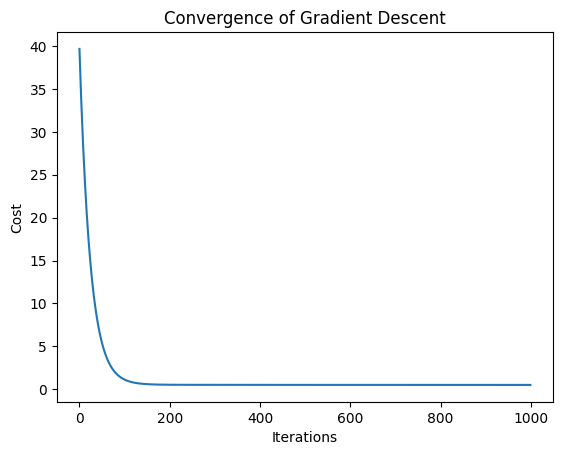

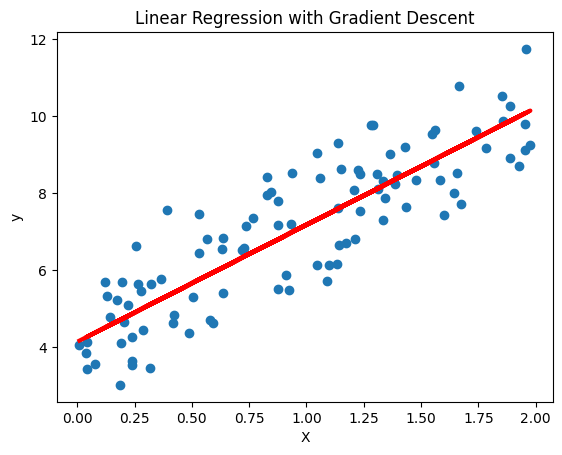

In [4]:

# Plotting the cost history
plt.plot(range(1000), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Convergence of Gradient Descent')
plt.show()

# Plotting the regression line
plt.scatter(X, y)
plt.plot(X, X_b.dot(beta), color='red', linewidth=3)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with Gradient Descent')
plt.show()

### <a id='toc3_4_'></a>[Implementing Stochastic Gradient Descent](#toc0_)


Now, let's implement stochastic gradient descent for comparison.


In [5]:
def stochastic_gradient_descent(X, y, learning_rate=0.01, num_epochs=50):
    n, m = X.shape
    beta = np.random.randn(m, 1)
    cost_history = []

    for epoch in range(num_epochs):
        for i in range(n):
            random_index = np.random.randint(n)
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradient = compute_gradient(xi, yi, beta)
            beta -= learning_rate * gradient

        cost = compute_cost(X, y, beta)
        cost_history.append(cost)

    return beta, cost_history

beta_sgd, cost_history_sgd = stochastic_gradient_descent(X_b, y)

💡 **Pro Tip:** In practice, it's often beneficial to use a decreasing learning rate schedule with SGD to ensure convergence.


### <a id='toc3_5_'></a>[Comparing the Results](#toc0_)


Let's compare the results of batch and stochastic gradient descent.


In [6]:
print("Batch GD coefficients:", beta.flatten())
print("SGD coefficients:", beta_sgd.flatten())

Batch GD coefficients: [4.14146131 3.04006593]
SGD coefficients: [4.20600422 3.05135835]


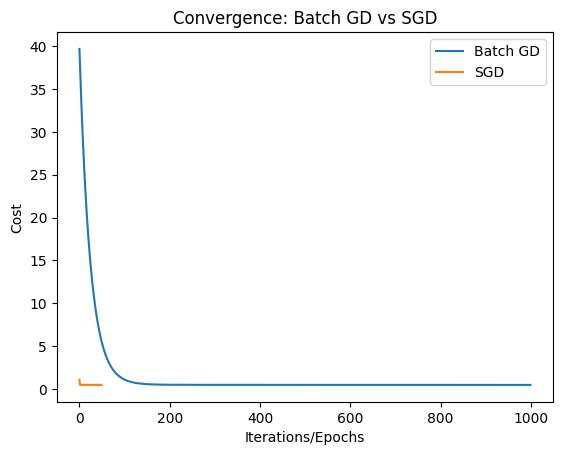

In [7]:
plt.plot(range(1000), cost_history, label='Batch GD')
plt.plot(range(50), cost_history_sgd, label='SGD')
plt.xlabel('Iterations/Epochs')
plt.ylabel('Cost')
plt.title('Convergence: Batch GD vs SGD')
plt.legend()
plt.show()

Finally, we can implement mini-batch gradient descent by combining the best of both worlds. This approach is often the most practical for real-world machine learning problems.

In [8]:
def mini_batch_gradient_descent(X, y, learning_rate=0.01, num_epoch=1000, batch_size=20):
    n, m = X.shape
    beta = np.random.randn(m, 1)
    cost_history = []

    for _ in range(num_epoch):
        shuffled_indices = np.random.permutation(n)
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        for i in range(0, n, batch_size):
            xi = X_shuffled[i:i+batch_size]
            yi = y_shuffled[i:i+batch_size]
            gradient = compute_gradient(xi, yi, beta)
            beta -= learning_rate * gradient

        cost = compute_cost(X, y, beta)
        cost_history.append(cost)

    return beta, cost_history

You can use this implementation with `batch_size=1` for pure stochastic gradient descent or set `batch_size` to a larger value for mini-batch gradient descent. If you set `batch_size` to the number of training examples, it becomes equivalent to batch gradient descent. Now let's test the implementation with different batch sizes and learning rates to see how they affect the convergence behavior.

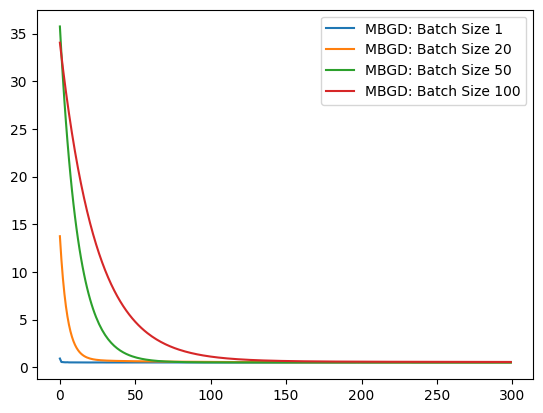

In [9]:
for batch_size in [1, 20, 50, 100]:
    beta_mbgd, cost_history_mbgd = mini_batch_gradient_descent(X_b, y, batch_size=batch_size, num_epoch=300)
    plt.plot(range(300), cost_history_mbgd, label=f'MBGD: Batch Size {batch_size}')
    plt.legend()

The use of **"epoch"** instead of "iteration" for a full round through the dataset is a convention in machine learning that helps distinguish between different levels of granularity in the training process. Here's why:

1. Clarity and Precision:
   - An "epoch" refers specifically to one complete pass through the entire dataset.
   - An "iteration" is more general and could refer to any single update step, which might not involve the entire dataset.

2. Batch vs. Full Dataset:
   - In mini-batch gradient descent, each mini-batch processing is an "iteration".
   - An "epoch" comprises multiple iterations to cover the full dataset.

3. Standardization:
   - Using "epoch" provides a standard way to measure and compare training progress across different models and datasets, regardless of batch size.

4. Hyperparameter Tuning:
   - "Epochs" are often used as a hyperparameter, making it easier to set and adjust the total amount of training.

5. Learning Dynamics:
   - Many learning phenomena (like learning rate schedules) are often described in terms of epochs rather than individual iterations.

6. Historical Context:
   - The term "epoch" has been used in neural network literature since at least the 1960s, becoming a standard term in the field.

Example:
If you have 1000 samples and a batch size of 100:
- Each processing of a 100-sample batch is an "iteration".
- It takes 10 iterations to complete one "epoch".

Using "epoch" allows us to talk about the training process at a higher level, focusing on complete passes through the data rather than individual update steps. This is particularly useful when discussing model convergence, overfitting, and other training dynamics that typically manifest over multiple passes through the dataset.

### <a id='toc3_6_'></a>[Practical Considerations](#toc0_)


When implementing gradient descent, keep these points in mind:

1. **Feature Scaling**: Normalize your features to ensure they're on similar scales. This can significantly speed up convergence.

2. **Learning Rate**: Choose an appropriate learning rate. Too small, and convergence will be slow; too large, and you might overshoot the minimum.

3. **Convergence Criteria**: In practice, you might want to stop when the change in cost falls below a certain threshold, rather than running for a fixed number of iterations.

4. **Regularization**: Consider adding regularization to prevent overfitting, especially for high-dimensional data.


⚠️ **Important Note:** While we've implemented gradient descent from scratch for educational purposes, in practice, you'd typically use optimized libraries like scikit-learn or TensorFlow for better performance and additional features.


By implementing gradient descent yourself, you gain a deeper understanding of how the algorithm works, which is invaluable when working with more complex models and optimization techniques in the future.

## <a id='toc4_'></a>[Summary and Key Takeaways](#toc0_)

In this lecture, we've explored gradient descent as a powerful optimization technique for linear regression. Let's recap the main points and highlight some key takeaways:

1. **Gradient Descent Fundamentals**: We learned that gradient descent is an iterative optimization algorithm used to minimize the cost function in linear regression.

2. **Mathematical Foundation**: We explored the mathematical basis of gradient descent, including the cost function derived from maximum likelihood estimation, partial derivatives, and the update rule.

3. **Types of Gradient Descent**: We discussed three main variants:
   - Batch Gradient Descent
   - Stochastic Gradient Descent (SGD)
   - Mini-Batch Gradient Descent

4. **Implementation**: We implemented gradient descent for linear regression using Python and NumPy, demonstrating both batch and stochastic approaches.


Understanding gradient descent opens the door to more advanced topics in machine learning:
- Regularization techniques (L1, L2) can be easily incorporated into the gradient descent framework.
- The concepts learned here extend to multivariate regression and classification problems.
- Many deep learning techniques build upon the fundamental ideas of gradient descent.


Mastering gradient descent not only helps in implementing linear regression but also provides a solid foundation for understanding more complex optimization problems in machine learning and artificial intelligence.


By grasping the concepts covered in this lecture, you're well-equipped to tackle more advanced machine learning algorithms and optimization techniques. Remember, practice and experimentation are key to fully internalizing these concepts and applying them effectively in real-world scenarios.